In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

population_data = pd.read_csv("population_state.csv")
population_data.head()

,state,date,sex,age,ethnicity,population
0,Johor,1970-01-01,both,overall,overall,1325.6
1,Johor,1970-01-01,both,0-4,overall,210.1
2,Johor,1970-01-01,both,5-9,overall,215.7
3,Johor,1970-01-01,both,10-14,overall,192.2
4,Johor,1970-01-01,both,15-19,overall,152.8


Plot for Johor first

In [2]:
population_data_johor = population_data[population_data['state'] == 'Johor']
population_data_johor.head()

,state,date,sex,age,ethnicity,population
0,Johor,1970-01-01,both,overall,overall,1325.6
1,Johor,1970-01-01,both,0-4,overall,210.1
2,Johor,1970-01-01,both,5-9,overall,215.7
3,Johor,1970-01-01,both,10-14,overall,192.2
4,Johor,1970-01-01,both,15-19,overall,152.8


In [3]:
population_data_johor = population_data_johor[(population_data_johor['age'] == 'overall') &
                                              (population_data_johor['ethnicity'] != 'overall')].copy()
population_data_johor["year"] = pd.to_datetime(population_data_johor["date"]).dt.year
population_data_johor.head()

,state,date,sex,age,ethnicity,population,year
481,Johor,1980-01-01,both,overall,bumi,899.7,1980
482,Johor,1980-01-01,both,overall,chinese,634.7,1980
483,Johor,1980-01-01,both,overall,indian,109.3,1980
484,Johor,1980-01-01,both,overall,other,2.5,1980
571,Johor,1980-01-01,female,overall,bumi,450.4,1980


In [4]:
ETHNICITY_MAP = {
    'bumi' : 'Bumiputera',
    'bumi_malay': 'Bumiputera',
    'bumi_other': 'Bumiputera',
    'chinese': 'Chinese',
    'indian': 'Indian',
    'other': 'Other',
    'other_citizen': 'Other',
    'other_noncitizen': 'Other'
}

population_data_johor["ethnicity_group"] = population_data_johor["ethnicity"].map(ETHNICITY_MAP)
population_data_johor.head()

,state,date,sex,age,ethnicity,population,year,ethnicity_group
481,Johor,1980-01-01,both,overall,bumi,899.7,1980,Bumiputera
482,Johor,1980-01-01,both,overall,chinese,634.7,1980,Chinese
483,Johor,1980-01-01,both,overall,indian,109.3,1980,Indian
484,Johor,1980-01-01,both,overall,other,2.5,1980,Other
571,Johor,1980-01-01,female,overall,bumi,450.4,1980,Bumiputera


In [5]:
pop_johor_ethnicity_overall = population_data_johor[population_data_johor['sex'] == 'both'].copy()
pop_johor_ethnicity_overall.head()

,state,date,sex,age,ethnicity,population,year,ethnicity_group
481,Johor,1980-01-01,both,overall,bumi,899.7,1980,Bumiputera
482,Johor,1980-01-01,both,overall,chinese,634.7,1980,Chinese
483,Johor,1980-01-01,both,overall,indian,109.3,1980,Indian
484,Johor,1980-01-01,both,overall,other,2.5,1980,Other
751,Johor,1981-01-01,both,overall,bumi,925.4,1981,Bumiputera


In [6]:
combined_johor = population_data_johor.groupby(
    ["state", "year", "sex", "ethnicity_group"]
).sum().reset_index()
combined_johor.head()

,state,year,sex,ethnicity_group,date,age,ethnicity,population
0,Johor,1980,both,Bumiputera,1980-01-01,overall,bumi,899.7
1,Johor,1980,both,Chinese,1980-01-01,overall,chinese,634.7
2,Johor,1980,both,Indian,1980-01-01,overall,indian,109.3
3,Johor,1980,both,Other,1980-01-01,overall,other,2.5
4,Johor,1980,female,Bumiputera,1980-01-01,overall,bumi,450.4


In [7]:
overall_johor_data = combined_johor.drop(["date", "age", "ethnicity"], axis = 1).copy()
overall_johor_data.head()

,state,year,sex,ethnicity_group,population
0,Johor,1980,both,Bumiputera,899.7
1,Johor,1980,both,Chinese,634.7
2,Johor,1980,both,Indian,109.3
3,Johor,1980,both,Other,2.5
4,Johor,1980,female,Bumiputera,450.4


In [8]:
overall_johor_data['ethnicity_group'].unique()

array(['Bumiputera', 'Chinese', 'Indian', 'Other'], dtype=object)

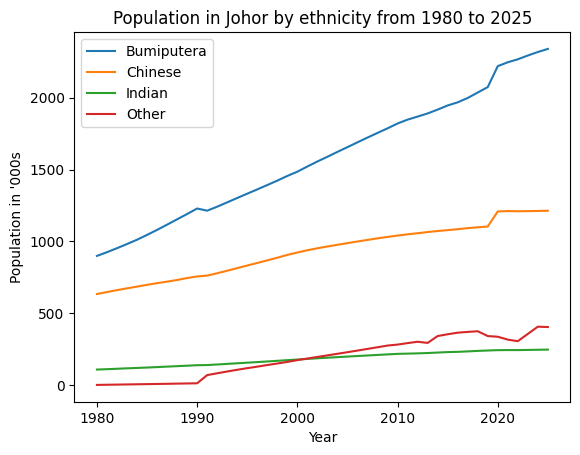

In [9]:
fig, ax = plt.subplots()

for ethnicity_group in overall_johor_data['ethnicity_group'].unique():
    ethnicity_group_data = overall_johor_data[(overall_johor_data['ethnicity_group'] == ethnicity_group)
                                        & (overall_johor_data['sex'] == 'both')].copy()
    ax.plot("year", "population", data = ethnicity_group_data, label = ethnicity_group)

ax.set(xlabel= "Year", ylabel= "Population in '000s", 
       title= "Population in Johor by ethnicity from 1980 to 2025")

ax.legend()

Plot for male

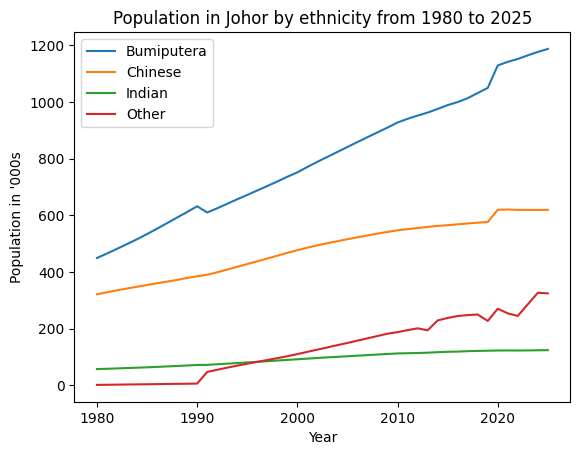

In [10]:
fig, ax = plt.subplots()

for ethnicity_group in overall_johor_data['ethnicity_group'].unique():
    ethnicity_group_data = overall_johor_data[(overall_johor_data['ethnicity_group'] == ethnicity_group)
                                        & (overall_johor_data['sex'] == 'male')].copy()
    ax.plot("year", "population", data = ethnicity_group_data, label = ethnicity_group)

ax.set(xlabel= "Year", ylabel= "Population in '000s", 
       title= "Population in Johor by ethnicity from 1980 to 2025")

ax.legend()

Plot for female

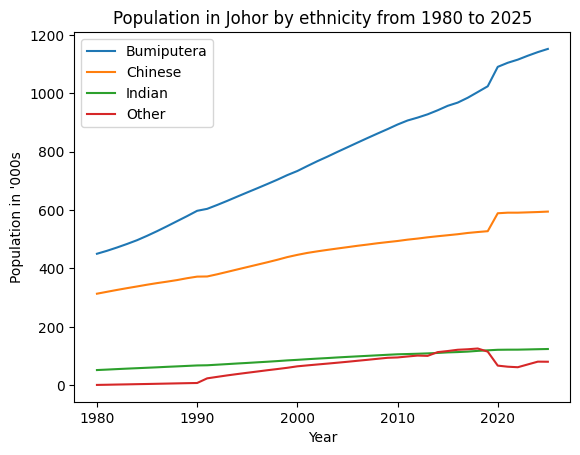

In [11]:
fig, ax = plt.subplots()

for ethnicity_group in overall_johor_data['ethnicity_group'].unique():
    ethnicity_group_data = overall_johor_data[(overall_johor_data['ethnicity_group'] == ethnicity_group)
                                        & (overall_johor_data['sex'] == 'female')].copy()
    ax.plot("year", "population", data = ethnicity_group_data, label = ethnicity_group)

ax.set(xlabel= "Year", ylabel= "Population in '000s", 
       title= "Population in Johor by ethnicity from 1980 to 2025")

ax.legend()

Plot by proportion

In [12]:
def norm_total(df):
    df["normed_population"] = df["population"] / df["population"].sum()
    return df


overall_johor_data_norm = overall_johor_data[overall_johor_data['sex'] == 'both'].copy()
overall_johor_data_norm = overall_johor_data_norm.groupby('year')[
    [col for col in overall_johor_data_norm.columns]].apply(norm_total)
overall_johor_data_norm.head()

state  year   sex ethnicity_group  population  normed_population
year                                                                     
1980 0   Johor  1980  both      Bumiputera       899.7           0.546531
     1   Johor  1980  both         Chinese       634.7           0.385555
     2   Johor  1980  both          Indian       109.3           0.066395
     3   Johor  1980  both           Other         2.5           0.001519
1981 12  Johor  1981  both      Bumiputera       925.4           0.547801

Use seaborn's barplot

In [13]:
twenty_one_afterwards = overall_johor_data_norm[overall_johor_data_norm['year'] > 2020]
twenty_one_afterwards.head(10)

state  year   sex ethnicity_group  population  normed_population
year                                                                      
2021 492  Johor  2021  both      Bumiputera      2246.2           0.558742
     493  Johor  2021  both         Chinese      1211.5           0.301361
     494  Johor  2021  both          Indian       244.9           0.060919
     495  Johor  2021  both           Other       317.5           0.078978
2022 504  Johor  2022  both      Bumiputera      2266.9           0.562744
     505  Johor  2022  both         Chinese      1210.1           0.300400
     506  Johor  2022  both          Indian       244.7           0.060745
     507  Johor  2022  both           Other       306.6           0.076112
2023 516  Johor  2023  both      Bumiputera      2293.1           0.558312
     517  Johor  2023  both         Chinese      1211.1           0.294872

<Axes: xlabel='normed_population', ylabel='ethnicity_group'>

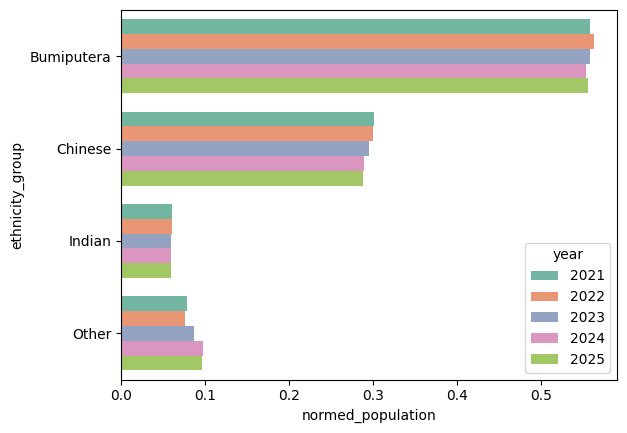

In [14]:
sns.barplot(x = "normed_population", y = "ethnicity_group", hue="year", 
            data = twenty_one_afterwards, palette='Set2')

In [15]:
twenty_one_afterwards = twenty_one_afterwards.reset_index(drop=True)
df_unstacked = twenty_one_afterwards.set_index(["year", "ethnicity_group"]
                                               )["normed_population"].unstack()
df_unstacked.head()

ethnicity_group,Bumiputera,Chinese,Indian,Other
year,,,,
2021,0.558742,0.301361,0.060919,0.078978
2022,0.562744,0.300400,0.060745,0.076112
2023,0.558312,0.294872,0.059846,0.086969
2024,0.553867,0.289695,0.059053,0.097386
2025,0.556137,0.288578,0.058990,0.096296


Now, plot the unstacked column

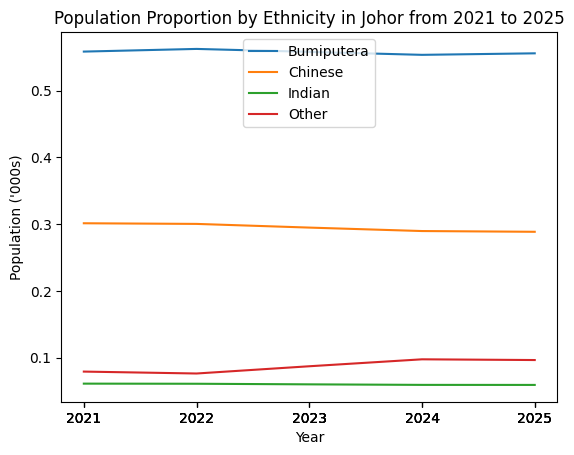

In [16]:
fig, ax = plt.subplots()

for col in df_unstacked.columns:
    ax.plot(df_unstacked.index, df_unstacked[col], label = col)

ax.set(xlabel="Year", ylabel="Population ('000s)", 
       title="Population Proportion by Ethnicity in Johor from 2021 to 2025")
ax.set_xticks(twenty_one_afterwards["year"])
ax.legend()
plt.show()

In [17]:
overall_johor_data_norm.head()

state  year   sex ethnicity_group  population  normed_population
year                                                                     
1980 0   Johor  1980  both      Bumiputera       899.7           0.546531
     1   Johor  1980  both         Chinese       634.7           0.385555
     2   Johor  1980  both          Indian       109.3           0.066395
     3   Johor  1980  both           Other         2.5           0.001519
1981 12  Johor  1981  both      Bumiputera       925.4           0.547801

In [18]:
overall_johor_data_norm = overall_johor_data_norm.reset_index(drop=True)
df_unstacked = overall_johor_data_norm.set_index(["year", "ethnicity_group"]
                                               )["normed_population"].unstack()
df_unstacked.head()

ethnicity_group,Bumiputera,Chinese,Indian,Other
year,,,,
1980,0.546531,0.385555,0.066395,0.001519
1981,0.547801,0.383709,0.066300,0.002190
1982,0.549579,0.381414,0.066240,0.002767
1983,0.551761,0.378700,0.066225,0.003314
1984,0.554357,0.375760,0.066050,0.003834


Plot proportion after unstacking MultiIndex DataFrame

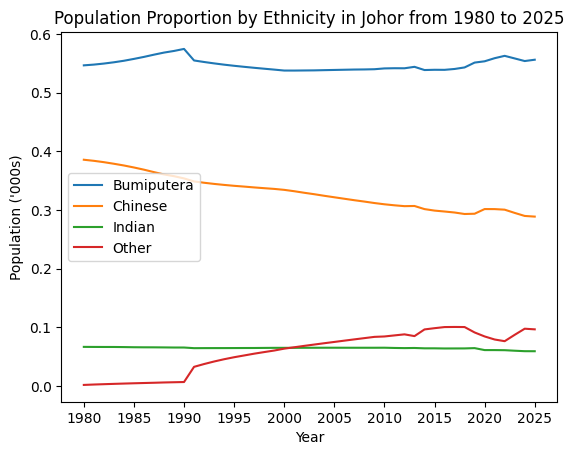

In [19]:
fig, ax = plt.subplots()

for col in df_unstacked.columns:
    ax.plot(df_unstacked.index, df_unstacked[col], label = col)

ax.set(xlabel="Year", ylabel="Population ('000s)", 
       title="Population Proportion by Ethnicity in Johor from 1980 to 2025")
ax.set_xticks(range(overall_johor_data_norm["year"].min(), overall_johor_data_norm["year"].max() + 1, 5))
ax.legend()
plt.show()

Aggregate for one year

In [21]:
overall_johor_data.head()

,state,year,sex,ethnicity_group,population
0,Johor,1980,both,Bumiputera,899.7
1,Johor,1980,both,Chinese,634.7
2,Johor,1980,both,Indian,109.3
3,Johor,1980,both,Other,2.5
4,Johor,1980,female,Bumiputera,450.4


General Function for Ethnicity Trend over the Years

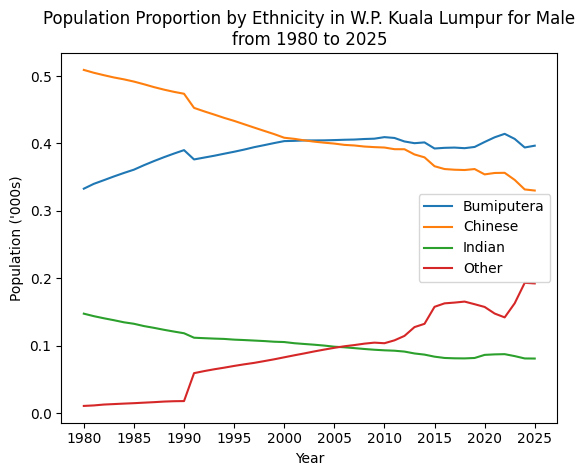

In [ ]:
BOUNDARY_CHANGES = {
    "Selangor": [2010],
    "Sabah": [1991]
}

ETHNICITY_MAP = {
    'bumi' : 'Bumiputera',
    'bumi_malay': 'Bumiputera',
    'bumi_other': 'Bumiputera',
    'chinese': 'Chinese',
    'indian': 'Indian',
    'other': 'Other',
    'other_citizen': 'Other',
    'other_noncitizen': 'Other'
}

def remove_boundary_years(df, state):
    years_to_drop = BOUNDARY_CHANGES.get(state, [])
    return df[~df["year"].isin(years_to_drop)]

def filter_population_state_year(state, gender = None, start_year = None):
    state = state.strip().title()

    df = population_data[(population_data["state"] == state) & (population_data['age'] != 'overall')].copy()
    
    df["year"] = pd.to_datetime(df["date"]).dt.year
    df["ethnicity_group"] = df["ethnicity"].map(ETHNICITY_MAP)
    
    df = df.groupby(["state", "year", "sex", "ethnicity_group"]).sum().reset_index()
    df = df.drop(["date", "age", "ethnicity"], axis = 1).copy()

    if gender is not None:
        df = df[df["sex"] == gender]
    else: 
        df = df[df["sex"] == "both"]

    if start_year is not None:
        df = df[df["year"] >= start_year]
    
    return df.copy()

def norm_total(df):
    df["normed_population"] = df["population"] / df["population"].sum()
    return df

def plot_overall_population(state, gender = None, start_year = None, normalized = False):
    df = filter_population_state_year(state, gender, start_year)
    df = remove_boundary_years(df, state)
    fig, ax = plt.subplots()

    first_year = df["year"].min()

    if gender is None:
        if not normalized:
            for ethnicity_group in df['ethnicity_group'].unique():
                ethnicity_group_data = df[(df['ethnicity_group'] == ethnicity_group)
                                        & (df['sex'] == 'both')].copy()
                ax.plot("year", "population", data = ethnicity_group_data, label = ethnicity_group)

            ax.set(xlabel= "Year", ylabel= "Population in '000s", 
            title= f"Population in {state} by ethnicity from {first_year} to 2025")

            ax.legend()
        else:
            df_norm = df[df['sex'] == 'both'].copy()
            df_norm = df_norm.groupby('year')[
                [col for col in df_norm.columns]].apply(norm_total)

            df_norm = df_norm.reset_index(drop=True)
            df_unstacked = df_norm.set_index(["year", "ethnicity_group"]
                                               )["normed_population"].unstack()
            
            for col in df_unstacked.columns:
                ax.plot(df_unstacked.index, df_unstacked[col], label = col)

            ax.set(xlabel="Year", ylabel="Population ('000s)", 
                title=f"Population Proportion by Ethnicity in {state} from {first_year} to 2025")
            ax.set_xticks(range(df_norm["year"].min(), df_norm["year"].max() + 1, 5))
            ax.legend()
             
    else:  
        if not normalized:
            for ethnicity_group in df['ethnicity_group'].unique():
                ethnicity_group_data = df[(df['ethnicity_group'] == ethnicity_group)
                                        & (df['sex'] == gender)].copy()
                ax.plot("year", "population", data = ethnicity_group_data, label = ethnicity_group)

            ax.set(xlabel= "Year", ylabel= "Population in '000s", 
                title= f"Population in {state} by ethnicity from {first_year} to 2025")

            ax.legend()
        else:
            df_norm = df[df['sex'] == gender].copy()
            df_norm = df_norm.groupby('year')[
                [col for col in df_norm.columns]].apply(norm_total)

            df_norm = df_norm.reset_index(drop=True)
            df_unstacked = df_norm.set_index(["year", "ethnicity_group"]
                                               )["normed_population"].unstack()
            
            for col in df_unstacked.columns:
                ax.plot(df_unstacked.index, df_unstacked[col], label = col)

            ax.set(xlabel="Year", ylabel="Population ('000s)", 
                title=f"Population Proportion by Ethnicity in {state} for {gender.title()}\nfrom {first_year} to 2025")
            ax.set_xticks(range(df_norm["year"].min(), df_norm["year"].max() + 1, 5))
            ax.legend()

plot_overall_population("W.P. Kuala Lumpur", gender="male", normalized= True)